In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.tri as tri
from scipy.stats import dirichlet

In [2]:
N_a = 5
N_b = 32
N_c = 15
alpha = [N_a + 1, N_b + 1, N_c + 1]

In [3]:
corners = np.array([[0, 0], [1, 0], [0, 1]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [4]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=10)

In [5]:
pvals = np.asarray([dirichlet.pdf([x, y, 1-x-y], alpha) for (x,y) in zip(trimesh.x, trimesh.y)])

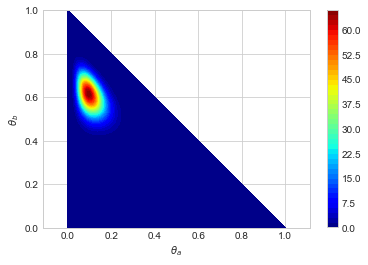

In [7]:
cp = plt.tricontourf(trimesh, pvals, 50, cmap='jet')
plt.colorbar(cp)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$\theta_a$')
plt.ylabel(r'$\theta_b$')
plt.axis('equal')
plt.savefig('p1b.png')
plt.show()